# Градиентный бустинг

### Что такое бустинг?

Бустинг (Boosting) — это метод машинного обучения, который объединяет несколько слабых моделей (обычно деревьев решений) в одну сильную модель. Основная идея заключается в том, что каждая последующая модель обучается на ошибках предыдущих, чтобы улучшить общую производительность. Бустинг является одним из самых популярных методов ансамблевого обучения.

### Как работает бустинг?

1. **Инициализация**: Начинается с простой модели, которая делает предсказания на основе исходных данных.
2. **Итеративное обучение**: На каждой итерации:
   - Вычисляются ошибки (остатки) текущей модели.
   - Новая модель обучается на этих ошибках, чтобы исправить недочеты предыдущей.
   - Веса моделей обновляются, чтобы минимизировать общую ошибку.
3. **Агрегация**: После нескольких итераций все модели объединяются, и их предсказания усредняются (или взвешиваются) для получения финального результата.

![grad_boost](./lecture5/grad_boost.png)


### Преимущества бустинга:
- Высокая точность предсказаний.
- Устойчивость к переобучению (при правильной настройке параметров).
- Возможность работы с различными типами данных.

### Недостатки бустинга:
- Может быть медленным в обучении, особенно на больших данных.
- Требует тщательной настройки гиперпараметров.

### Популярные библиотеки для бустинга:
- **XGBoost**: Высокая производительность и гибкость.
- **LightGBM**: Оптимизирован для работы с большими данными.
- **CatBoost**: Хорошо работает с категориальными данными.


### Пример использования бустинга на Python

Один из самых популярных алгоритмов бустинга — **Gradient Boosting**. В Python его можно реализовать с помощью библиотеки `scikit-learn` или специализированных библиотек, таких как `XGBoost`, `LightGBM` или `CatBoost`.

Mean Squared Error: 0.0007717593601131536


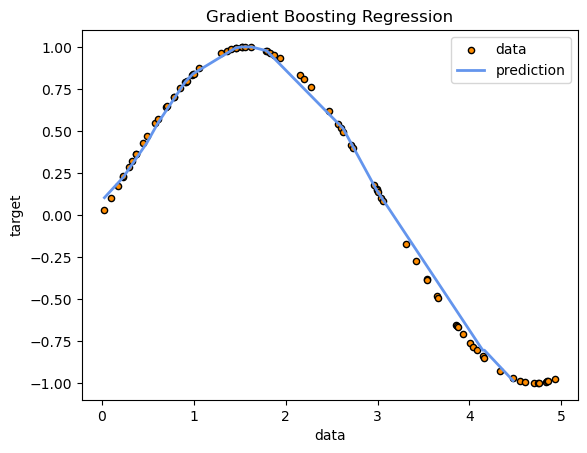

In [17]:
#### Пример с использованием `GradientBoostingRegressor` из `scikit-learn`:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Создание синтетических данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80,1), axis=0)
y = np.sin(X).ravel() + 0.0*np.random.normal(0, 0.1, X.shape[0])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель градиентного бустинга
model = GradientBoostingRegressor(n_estimators=5005, learning_rate=0.01, max_depth=3, random_state=42)

# Обучаем модель
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

X_test = np.sort(X_test, axis=0)
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()

Бустинг называется **градиентным** (Gradient Boosting), потому что в его основе лежит идея минимизации функции потерь с использованием **градиентного спуска**.

---

### Основная идея градиентного бустинга

1. **Функция потерь (Loss Function)**:
   - В машинном обучении мы хотим минимизировать функцию потерь, которая измеряет, насколько предсказания модели отличаются от истинных значений.
   - Например, для регрессии часто используется среднеквадратичная ошибка (MSE), а для классификации — логарифмическая потеря (log loss).

2. **Градиентный спуск**:
   - Градиентный спуск — это метод оптимизации, который ищет минимум функции потерь, двигаясь в направлении, противоположном градиенту (вектору частных производных).
   - В градиентном бустинге мы используем градиентный спуск не в пространстве параметров модели, а в пространстве **функций** (моделей).

3. **Остатки как градиенты**:
   - На каждой итерации бустинга мы вычисляем **остатки** (разницу между истинными значениями и предсказаниями текущей модели). Эти остатки можно интерпретировать как **градиенты** функции потерь.
   - Новая модель (обычно дерево решений) обучается предсказывать эти остатки, чтобы "исправить" ошибки предыдущей модели.

4. **Итеративное улучшение**:
   - На каждой итерации мы добавляем новую модель, которая корректирует ошибки предыдущих моделей, двигаясь в направлении, противоположном градиенту функции потерь.
   - Это похоже на градиентный спуск, но вместо обновления параметров модели мы добавляем новые модели (деревья) к ансамблю.


### Математическая интерпретация

Рассмотрим задачу регрессии с функцией потерь $ L(y, F(x)) $, где:
- $ y $ — истинное значение,
- $ F(x) $ — предсказание модели, состоящее из некоторой агрегации моделей (функций) $F_m(x) = \sum_i^{m} a_i h_i(x)$

1. На первой итерации модель $ F_0(x) $ предсказывает константу (например, среднее значение $ y $).
2. На каждой следующей итерации $ m $:
   - Вычисляем остатки (градиенты):
     $$
     r_{im} = -\frac{\partial L(y_i, F_{m-1}(x_i))}{\partial F_{m-1}(x_i)}
     $$
   - Обучаем новую модель $ h_m(x) $ (часто, дерево решений) на этих остатках.
   - Обновляем общую модель:
     $$
     F_m(x) = F_{m-1}(x) + \nu h_m(x)
     $$
     где $ \nu $ — скорость обучения (learning rate), может подбираться на каждой итерации решением задачи 1D оптимизации.
3. Процесс повторяется до тех пор, пока не будет достигнуто заданное количество итераций (`n_estimators`).


# Автоматический подбор гиперпараметров

В Python существует несколько популярных библиотек для автоматического подбора гиперпараметров моделей машинного обучения. Эти библиотеки помогают находить оптимальные значения гиперпараметров, что позволяет улучшить качество моделей без необходимости ручного перебора.

### 1. **GridSearchCV (Scikit-learn)**
   - **Описание**: Полный перебор всех возможных комбинаций гиперпараметров из заданной сетки.
   - **Плюсы**:
     - Простота использования.
     - Гарантирует нахождение лучшей комбинации в пределах заданной сетки.
   - **Минусы**:
     - Может быть очень медленным, особенно при большом количестве гиперпараметров.
   - **Пример использования**:

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Создание синтетических данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80,1), axis=0)
y = np.sin(X).ravel() + 0.0*np.random.normal(0, 0.1, X.shape[0])

# Определение модели
model = RandomForestRegressor(random_state=42)

# Сетка гиперпараметров
param_grid = {
         'n_estimators': [10, 100, 200],
         'max_depth': [2, 10, 35],
     }

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring= 'neg_mean_squared_error')
grid_search.fit(X, y)

# Лучшие параметры
print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Средняя квадратичная ошибка (MSE) на тестовой выборке:", mse)

Best parameters: {'max_depth': 10, 'n_estimators': 200}
Средняя квадратичная ошибка (MSE) на тестовой выборке: 0.8470257415673282


### 2. **RandomizedSearchCV (Scikit-learn)**
   - **Описание**: Случайный поиск гиперпараметров из заданного распределения.
   - **Плюсы**:
     - Быстрее, чем `GridSearchCV`, особенно для больших пространств гиперпараметров.
     - Позволяет задавать распределения для непрерывных параметров.
   - **Минусы**:
     - Нет гарантии нахождения оптимальной комбинации.
   - **Пример использования**:

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Создание синтетических данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80,1), axis=0)
y = np.sin(X).ravel() + 0.0*np.random.normal(0, 0.1, X.shape[0])

# Определение модели
model = RandomForestRegressor(random_state=42)

# Сетка гиперпараметров
param_dist = {
         'n_estimators': randint(10, 200),
         'max_depth': randint(2, 35),
     }

# RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X, y)

# Лучшие параметры
print("Best parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Средняя квадратичная ошибка (MSE) на тестовой выборке:", mse)

Best parameters: {'max_depth': 9, 'n_estimators': 198}
Средняя квадратичная ошибка (MSE) на тестовой выборке: 0.8459463950509752


### 3. **Hyperopt**
   - **Описание**: Библиотека для байесовской оптимизации гиперпараметров.
   - **Плюсы**:
     - Эффективен для больших пространств гиперпараметров.
     - Поддерживает различные распределения параметров.
   - **Минусы**:
     - Может быть сложным для новичков.

In [25]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Создание синтетических данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80,1), axis=0)
y = np.sin(X).ravel() + 0.0*np.random.normal(0, 0.1, X.shape[0])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Целевая функция для Hyperopt
def objective(params):
    model = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        random_state=42)
    score = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    return -score  # Используем отрицательную среднюю квадратичную ошибку (чем ближе к 0, тем лучше)

# Пространство гиперпараметров
space = {
         'n_estimators': hp.quniform('n_estimators', 10, 200, 10),
         'max_depth': hp.quniform('max_depth', 2, 32, 1),
     }

# Оптимизация
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Лучшие параметры
print("Best parameters:", best)

# Обучение модели с наилучшими гиперпараметрами
best_model = RandomForestRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    random_state=42
)
best_model.fit(X_train, y_train)

# Оценка качества модели
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Средняя квадратичная ошибка (MSE) на тестовой выборке:", mse)

100%|███████████████████████████████████████████████| 50/50 [01:41<00:00,  2.02s/trial, best loss: 0.07892047389712764]
Best parameters: {'max_depth': 8.0, 'n_estimators': 190.0}
Средняя квадратичная ошибка (MSE) на тестовой выборке: 0.0010705096774750776


Байесовская оптимизация — это метод оптимизации гиперпараметров машинного обучения, который эффективно работает в условиях, когда оценка целевой функции (например, точность модели) требует значительных вычислительных ресурсов. Основная идея заключается в использовании вероятностной модели (обычно гауссовского процесса) для аппроксимации целевой функции и последовательном выборе точек для оценки, чтобы найти оптимальные гиперпараметры.

## Основные этапы байесовской оптимизации:
1. Построение априорной модели:

Используется вероятностная модель (чаще всего гауссовский процесс), которая описывает априорное распределение целевой функции. Эта модель строится на основе уже известных значений целевой функции в некоторых точках (гиперпараметрах).

2. Выбор следующей точки для оценки:

Для выбора следующей точки используется функция аквизиции (acquisition function), которая балансирует между исследованием (exploration) новых областей пространства гиперпараметров и использованием (exploitation) уже известных хороших значений. Примеры функций аквизиции:

    - Expected Improvement (EI): Ожидаемое улучшение.
    - Probability of Improvement (PI): Вероятность улучшения.
    - Upper Confidence Bound (UCB): Верхняя граница доверительного интервала.

3. Оценка целевой функции:

В выбранной точке вычисляется значение целевой функции (например, точность модели на валидационном наборе данных).

4. Обновление модели:

Модель гауссовского процесса обновляется с учетом нового значения целевой функции. Это позволяет уточнить апостериорное распределение и улучшить предсказания.

5. Итерации:

Шаги 2–4 повторяются до тех пор, пока не будет достигнуто условие остановки (например, исчерпание вычислительного бюджета или достижение приемлемого значения целевой функции).

### Преимущества байесовской оптимизации
- Эффективность: требует меньшего количества оценок целевой функции по сравнению с методами полного перебора или случайного поиска.

- Учет неопределенности: использует вероятностную модель, которая учитывает неопределенность в предсказаниях.

- Автоматизация: подходит для автоматической настройки гиперпараметров.

## Гауссовскогий процесс (GP) для регрессии

![gp](./lecture5/gp.png)

### 1. **Модель данных**
Предположим, у нас есть набор данных $ D = \{ (x_i, y_i) \}_{i=1}^n $, где $ x_i \in \mathbb{R}^d $ — входные векторы, а $ y_i \in \mathbb{R} $ — соответствующие целевые значения. Мы предполагаем, что целевые значения $ y_i $ связаны с входными данными $ x_i $ через неизвестную функцию $ f(x) $:

$$
y_i = f(x_i) + \epsilon_i,
$$

где $ \epsilon_i $ — гауссовский шум с нулевым средним и дисперсией $ \sigma^2 $: $ \epsilon_i \sim \mathcal{N}(0, \sigma^2) $.

### 2. **Априорное распределение**
Мы задаём априорное распределение на функцию $ f(x) $ как гауссовский процесс:

$$
f(x) \sim \mathcal{GP}(m(x), k(x, x')),
$$

где:
- $ m(x) $ — средняя функция (часто предполагается нулевой: $ m(x) = 0 $),
- $ k(x, x') $ — ковариационная функция (ядро), которая определяет сходство между точками $ x $ и $ x'$.

### 3. **Ковариационная матрица**
Для набора данных $ X = \{ x_i \}_{i=1}^n $ ковариационная матрица $ K $ вычисляется как:

$$
K_{ij} = k(x_i, x_j),
$$

где $ K_{ij} $ — элемент матрицы $ K $ на пересечении $ i $-й строки и $ j $-го столбца. С учётом шума ковариационная матрица целевых значений $ y $ становится:

$$
\text{Cov}(y) = K + \sigma^2 I,
$$

где $ I $ — единичная матрица.

### 4. **Апостериорное распределение**
Для нового входного вектора $ x_* $ апостериорное распределение $ f(x_*) $ при условии данных $ D $ также является гауссовским:

$$
f(x_*) \mid D \sim \mathcal{N}(\mu_*, \sigma_*^2),
$$

где:
- $ \mu_* $ — среднее значение предсказания:
  $$
  \mu_* = k_*^T (K + \sigma^2 I)^{-1} y,
  $$
  где $ k_* = [k(x_*, x_1), k(x_*, x_2), \dots, k(x_*, x_n)]^T $.
- $ \sigma_*^2 $ — дисперсия предсказания:
  $$
  \sigma_*^2 = k(x_*, x_*) - k_*^T (K + \sigma^2 I)^{-1} k_*.
  $$

### 5. **Предсказание**
Для нового входного вектора $ x_* $ предсказанное значение $ y_* $ и его дисперсия вычисляются как:

$$
y_* \sim \mathcal{N}(\mu_*, \sigma_*^2 + \sigma^2).
$$


Гауссовский процесс для регрессии позволяет:
1. Моделировать сложные нелинейные зависимости.
2. Оценивать неопределённость предсказаний.
3. Адаптироваться к данным через выбор ядра и оптимизацию гиперпараметров.

### Итог

Выбор библиотеки зависит от ваших задач:
- Для простоты и удобства: **GridSearchCV** или **RandomizedSearchCV**.
- Для сложных задач и больших пространств параметров:  **Hyperopt**  (аналоги **Optuna** или **BayesianOptimization**).